<a href="https://colab.research.google.com/github/raamiiChu/111-1_NCCU_DCT_3D_Game_Programming_G2/blob/main/%E6%B8%AC%E8%A9%A6%E7%94%A8/%E5%A6%82%E4%BD%95%E5%88%86%E6%AE%B5%E3%80%81%E4%B8%B2%E6%8E%A5%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 下載、匯入模組

In [ ]:
!pip install speechbrain
!pip install datasets

     |████████████████████████████████| 408 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 59.4 MB/s 
     |████████████████████████████████| 84 kB 1.6 MB/s 
     |████████████████████████████████| 596 kB 42.6 MB/s 
     |████████████████████████████████| 109 kB 48.0 MB/s 
     |████████████████████████████████| 546 kB 47.0 MB/s 
  Created wheel for hyperpyyaml: filename=HyperPyYAML-1.0.1-py3-none-any.whl size=15192 sha256=9f716eb4027cc8accd1954edceeae608d0c6199663a3301124a802fa423cbaeb
  Stored in directory: /root/.cache/pip/wheels/6c/87/65/266d722c3932f81f16332ce842e972be8421e3a9cd3771766b
Successfully built hyperpyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 346 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 47.0 MB/s 
     |████████████████████████████████| 212 kB 55.0 MB/s 
     |█████████████████████████████

In [ ]:
import torchaudio
import torch
import numpy as np
import pandas as pd

from speechbrain.pretrained import EncoderClassifier
from datasets import concatenate_datasets, load_dataset
from typing import List

### 下載資料庫、轉換器

In [ ]:
lang = "ja"

ja_train_dataset = load_dataset("common_voice", lang, split="train")

ja_test_dataset = load_dataset("common_voice", lang, split="test")

ja_valid_dataset = load_dataset("common_voice", lang, split="validation")

Generating train split:   0%|          | 0/722 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/632 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/586 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/885 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/3072 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/504 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)


In [ ]:
lang = "vi"

vi_train_dataset = load_dataset("common_voice", lang, split="train")

vi_test_dataset = load_dataset("common_voice", lang, split="test")

vi_valid_dataset = load_dataset("common_voice", lang, split="validation")

Generating train split:   0%|          | 0/221 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/198 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/870 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/619 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/78 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/vi/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/vi/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/vi/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)


In [ ]:
language_id = EncoderClassifier.from_hparams(source="TalTechNLP/voxlingua107-epaca-tdnn", savedir="tmp")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

### 儲存資料

In [ ]:
def get_emb(path:str) -> torch.Tensor:
    signal = language_id.load_audio(path)
    emb =  language_id.encode_batch(signal)
    return emb

In [ ]:
# [:100] 代表取前100個，如果資料太多，可以考慮用這種方式來分段執行，最後再把資料合起來
# 10000筆資料，大約要跑80分鐘
# 每種語言的資料數量盡可能差不多，可以跟其他人協調看看
ja_train_emb = [get_emb(path) for path in np.array(ja_train_dataset["path"][:100])]

In [ ]:
ja_train_emb

[tensor([[[ -3.8872,   8.4035,  -0.7939,   2.0204,  -7.7323,   4.8718,  -3.5711,
            -8.8073, -11.7443,  -1.7564,   3.8536,  -1.1396,  -5.2223,   6.3752,
             3.0388,   3.2389,   2.8753,   9.2986,  -1.7935,   2.9479,  -2.7860,
            -2.0910,  -0.5583,   3.6331,   5.5192,   4.6548,   6.4593,  -5.2591,
             1.4262,   5.6080,   4.3648,  -7.1033,   1.2792,  -0.8371,   6.7874,
             1.0150,  -4.0855,   9.4298,   0.8546,   9.9167,  -6.3048,  -6.2552,
             2.4460,   2.6921,   4.6360, -12.3111,  10.3864,   2.3354,  -5.1642,
            -4.8627,   4.5121,  -6.6420,  -0.8161,  13.7370,  11.8199,  -5.9550,
            -2.4724,   6.2888,   1.0345,   5.1424,   5.5663,   7.6350,   3.2869,
           -10.5707,  -4.9705,  -2.3980, -11.6955,  -0.5567,  12.5761,  -2.6765,
            -0.8066,   0.9714,  -5.3493,   4.2175,  -3.0220,   6.4177,   3.7658,
            -5.1927,   6.5267,   1.5934,  -9.3895,   1.4496,  -2.9143,  -3.7026,
            -0.3058,   8.368

In [ ]:
ja_train_emb[0].shape

torch.Size([1, 1, 256])

In [ ]:
# 儲存資料，torch.save(要儲存的資料, 路徑)
torch.save(ja_train_emb, "tmp/ja_train_emb.pt")

**<font color=FF3030>因為儲存在暫存區，如果斷網路，資料就會消失，所以記得下載下來</font>**

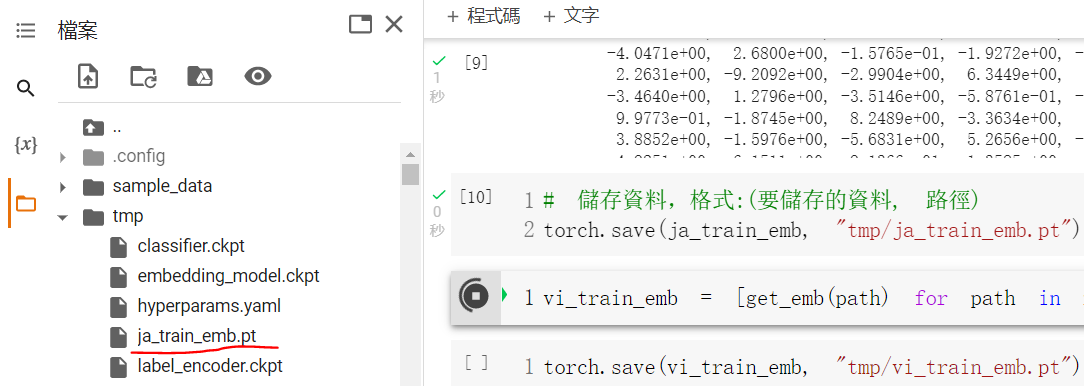

In [ ]:
vi_train_emb = [get_emb(path) for path in np.array(vi_train_dataset["path"][:100])]

In [ ]:
torch.save(vi_train_emb, "tmp/vi_train_emb.pt")

### 讀取資料、串接資料

In [ ]:
# torch.load(路徑)
ja_train = torch.load("tmp/ja_train_emb.pt")
vi_train = torch.load("tmp/vi_train_emb.pt")

In [ ]:
ja_train[0].shape

torch.Size([1, 1, 256])

In [ ]:
# 因為資料型態為 List[torch.tensor] ，最外層是 List，所以直接加起來就能串接
x_train = (ja_train + vi_train)
print(len(ja_train), len(vi_train), len(x_train))
print(ja_train[0].shape, vi_train[0].shape, x_train[0].shape)
# print(ja_train[0], x_train[0])
# print(vi_train[0], x_train[100])

100 100 200
torch.Size([1, 1, 256]) torch.Size([1, 1, 256]) torch.Size([1, 1, 256])


In [ ]:
# 儲存串接後的資料
torch.save(x_train, "tmp/x_train_emb.pt")

In [ ]:
# 看要不要幫製作模型的人處理(因為這段程式碼有放在測試DNN，如果有的話記得提醒負責的人)
# 把內部資料從 torch.tensor 轉成 numpy.array，並調整維度為(256,)
x_train = np.array([data.numpy().reshape(256,) for data in x_train])
print(x_train.shape, x_train[0].shape)

(200, 256) (256,)
